# Proszę zaimplementować rekurencyjną LU faktoryzację bazując na swoim rekurencyjnym mnożeniu i odwracaniu macierzy


In [1]:
import random


### Tworzenie macierzy

In [2]:
def createMatrix(size):
    matrix = []
    for i in range(size):
        matrix.append([])
        for j in range(size):
#             matrix[i].append(random.uniform(0, 1))
            matrix[i].append(random.randint(1,100))
    return matrix

### Wyświetlenie macierzy

In [3]:
def printMatrix(matrix):
    for row in matrix:
        print(row)

In [4]:
matrix1 = createMatrix(4)
printMatrix(matrix1)

[64, 55, 34, 46]
[66, 16, 38, 23]
[48, 60, 94, 16]
[15, 86, 70, 50]


## LU faktoryzacja metodą Doolitle'a

In [5]:
from LU_factorization import doolittleLUFactorization, doolittleLUFactorizationWithOperationCounting

## Blokowa LU factoryzacja - pseudokod albo wzór

In [6]:
from LU_factorization import LUBlockFactorization, LUBlockFactorizationWithOperationCounting


## Porównanie metod faktoryzacji

In [7]:
L, U = doolittleLUFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[1.03125, 1.0, 0.0, 0.0]
[0.75, -0.4604758250191865, 1.0, 0.0]
[0.234375, -1.7954719877206446, 0.9635346854468347, 1.0]



[64, 55, 34, 46]
[0.0, -40.71875, 2.9375, -24.4375]
[0.0, 0.0, 69.85264773599386, -29.752877973906372]
[0.0, 0.0, 0.0, 24.00983321980268]


In [8]:
L, U = LUBlockFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[1.03125, 1.0, 0.0, 0.0]
[0.75, -0.4604758250191865, 1.0, 0.0]
[0.234375, -1.7954719877206444, 0.9635346854468347, 1.0]



[64, 55, 34.0, 46.0]
[0.0, -40.71875, 2.9375, -24.4375]
[0.0, 0.0, 69.85264773599386, -29.752877973906372]
[0.0, 0.0, 0.0, 24.009833219802687]


## Test poprawności metod

In [9]:
from multiplication import hybridMultiplication, sub

In [10]:
L1, U1 = doolittleLUFactorization(matrix1)
L2, U2 = LUBlockFactorization(matrix1)

dolittleError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L1, U1, 2**4))])
blockError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L2, U2, 2**4))])

print(dolittleError)
print(blockError)

0.0
1.4210854715202004e-14


## TODO Wartości własne i wyznacznik

In [11]:
matrices = [createMatrix(2**x) for x in range(1,10)]
sizes = [x for x in range(1,10)]

In [12]:
from LU_factorization import getEigenValues, calculateDeterminant

In [37]:
matrixEgienL = []
matrixDeterminantL = []

matrixEgienU = []
matrixDeterminantU = []

for matrix in matrices:
    L, U = LUBlockFactorization(matrix)
    matrixEgienL.append(getEigenValues(L))
    matrixDeterminantL.append(calculateDeterminant(L))
    matrixEgienU.append(getEigenValues(U))
    matrixDeterminantU.append(calculateDeterminant(U))

In [45]:
print(matrixEgienL[1])
print(matrixDeterminantL[1])
print(matrixEgienU[1])
print(matrixDeterminantU[1])

[1.0, 1.0, 1.0, 1.0]
1.0
[36, 33.30555555555556, -140.22602168473728, 0.42697658373531056]
-71788.0000000015


In [13]:
print(getEigenValues(U1))
print(calculateDeterminant(U1))

[64, -40.71875, 69.85264773599386, 24.00983321980268]
-4370654.000000001


In [14]:
print(getEigenValues(U2))
print(calculateDeterminant(U2))

[64, -40.71875, 69.85264773599386, 24.009833219802687]
-4370654.000000002


## TODO Testy czasowe

In [15]:
import timeit
def calculateRunningTime(funct,matrix):
    start = timeit.default_timer()
    funct(matrix)
    stop = timeit.default_timer()
    return (stop - start)


In [16]:
matrixTimes1 = []
matrixTimes2 = []

for matrix in matrices:
    matrixTimes1.append(calculateRunningTime(doolittleLUFactorization, matrix))
    matrixTimes2.append(calculateRunningTime(LUBlockFactorization, matrix))

In [17]:
print(matrixTimes1)
print('\n')
print(matrixTimes2)

[1.300001167692244e-05, 1.7800004570744932e-05, 6.02000072831288e-05, 0.00047670000640209764, 0.0015011999930720776, 0.009815299999900162, 0.07182029999967199, 0.6971682000003057, 6.034315500000957]


[1.2300006346777081e-05, 9.469999349676073e-05, 0.00044510001316666603, 0.002756199988652952, 0.013916099997004494, 0.05689150000398513, 0.44502640000428073, 2.8519051000039326, 20.980119300002116]


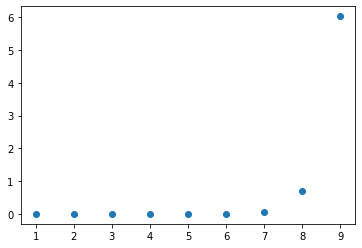

In [18]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixTimes1)
plt.show()

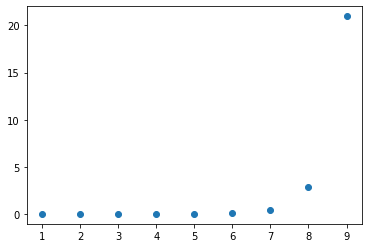

In [19]:
plt.scatter(sizes, matrixTimes2)
plt.show()

## TODO Ilość operacji

In [20]:
from multiplication import hybridMultiplicationWithOperationCounting, sub

matrixOperations1 = []
matrixOperations2 = []



for matrix in matrices:
    L1, U1, fpOperations1 = doolittleLUFactorizationWithOperationCounting(matrix)
    L2, U2, fpOperations2 = LUBlockFactorizationWithOperationCounting(matrix)

    matrixOperations1.append(fpOperations1)
    matrixOperations2.append(fpOperations2)


In [21]:
print(matrixOperations1)
print(matrixOperations2)

[3, 34, 308, 2600, 21328, 172704, 1389888, 11152000, 89347328]
[3, 122, 1300, 11208, 91856, 719008, 5488832, 40475392, 291857024]


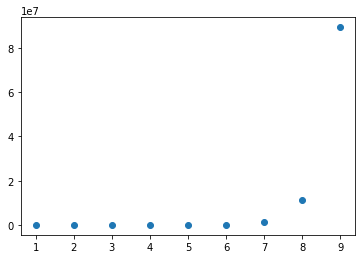

In [22]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixOperations1)
plt.show()

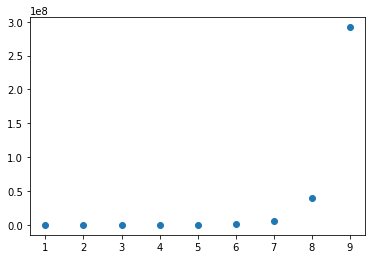

In [23]:
plt.scatter(sizes, matrixOperations2)
plt.show()

In [36]:
for idx, matrix in enumerate(matrices, start=1):
    with open(f'matrices/{idx}.txt', 'a+') as f:
        for row in matrix:
            f.write("%s\n" % str(row)[1:-1])